In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

from sklearn.pipeline import Pipeline
from src.perform_database_operations import perform_database_operations
from src.preprocessing import PreprocessingUtils
from src.visualization import VisualizationUtils

In [ ]:
config_file_path = '../config_database.json'
database_name = 'telecom'
sql_query = 'SELECT * FROM xdr_data'

df = perform_database_operations(config_file_path, database_name, sql_query)

In [ ]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
visualize = VisualizationUtils()

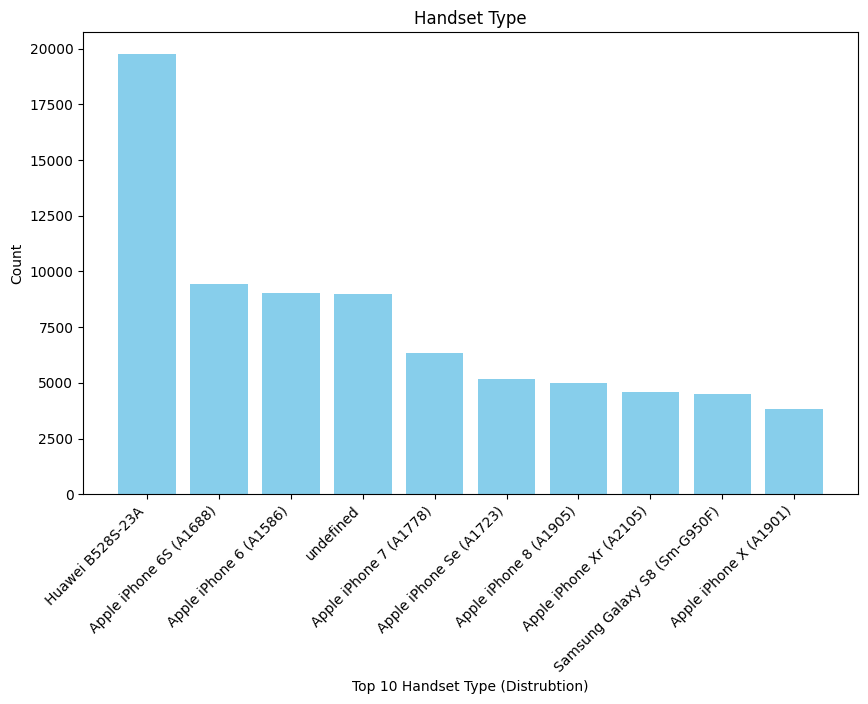

2024-04-23 21:15:18,363 - src.visualization - INFO - Bar plot created for 'Handset Type'


In [ ]:
top_10_handset_type = df['Handset Type'].value_counts().head(10)

visualize.plot_bar(top_10_handset_type, xlabel="Top 10 Handset Type (Distrubtion)", ylabel='Count', title='Handset Type')

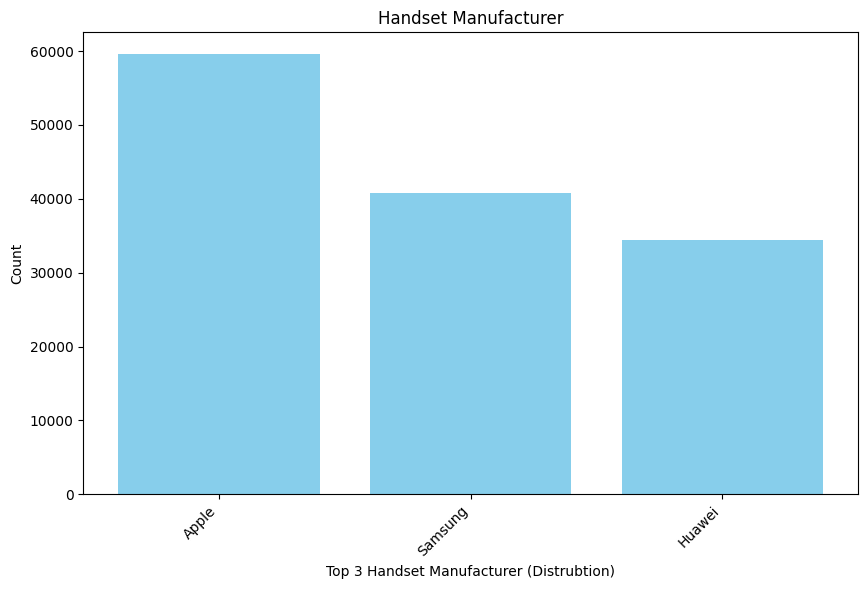

2024-04-23 21:21:02,992 - src.visualization - INFO - Bar plot created for 'Handset Manufacturer'


In [ ]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

visualize.plot_bar(top_3_manufacturers, xlabel="Top 3 Handset Manufacturer (Distrubtion)", ylabel='Count', title='Handset Manufacturer')

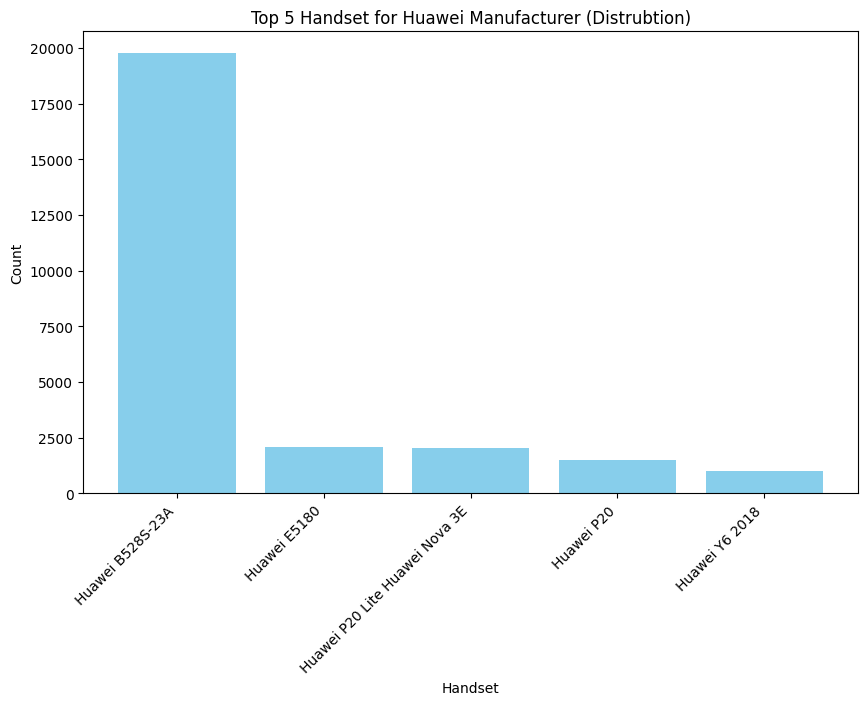

2024-04-23 21:24:33,807 - src.visualization - INFO - Bar plot created for 'Top 5 Handset for Huawei Manufacturer (Distrubtion)'


In [ ]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

choosen_manufacturer ='Huawei'
visualize.plot_bar(top_5_handsets_per_manufacturer[choosen_manufacturer], title=f"Top 5 Handset for {choosen_manufacturer} Manufacturer (Distrubtion)", ylabel='Count', xlabel='Handset')

2024-04-24 08:51:40,381 - src.visualization - INFO - Histogram plot created for 'Social Media DL (Bytes)'
2024-04-24 08:51:40,414 - src.visualization - INFO - Histogram plot created for 'Other DL (Bytes)'
2024-04-24 08:51:40,448 - src.visualization - INFO - Histogram plot created for 'Avg RTT UL (ms)'
2024-04-24 08:51:40,626 - src.visualization - INFO - Histogram plot created for 'UL TP < 10 Kbps (%)'
2024-04-24 08:51:40,656 - src.visualization - INFO - Histogram plot created for 'Nb of sec with 125000B < Vol DL'
2024-04-24 08:51:40,693 - src.visualization - INFO - Histogram plot created for 'Social Media UL (Bytes)'
2024-04-24 08:51:40,723 - src.visualization - INFO - Histogram plot created for 'Google DL (Bytes)'
2024-04-24 08:51:40,754 - src.visualization - INFO - Histogram plot created for 'Nb of sec with 6250B < Vol DL < 31250B'
2024-04-24 08:51:40,790 - src.visualization - INFO - Histogram plot created for 'Total DL (Bytes)'


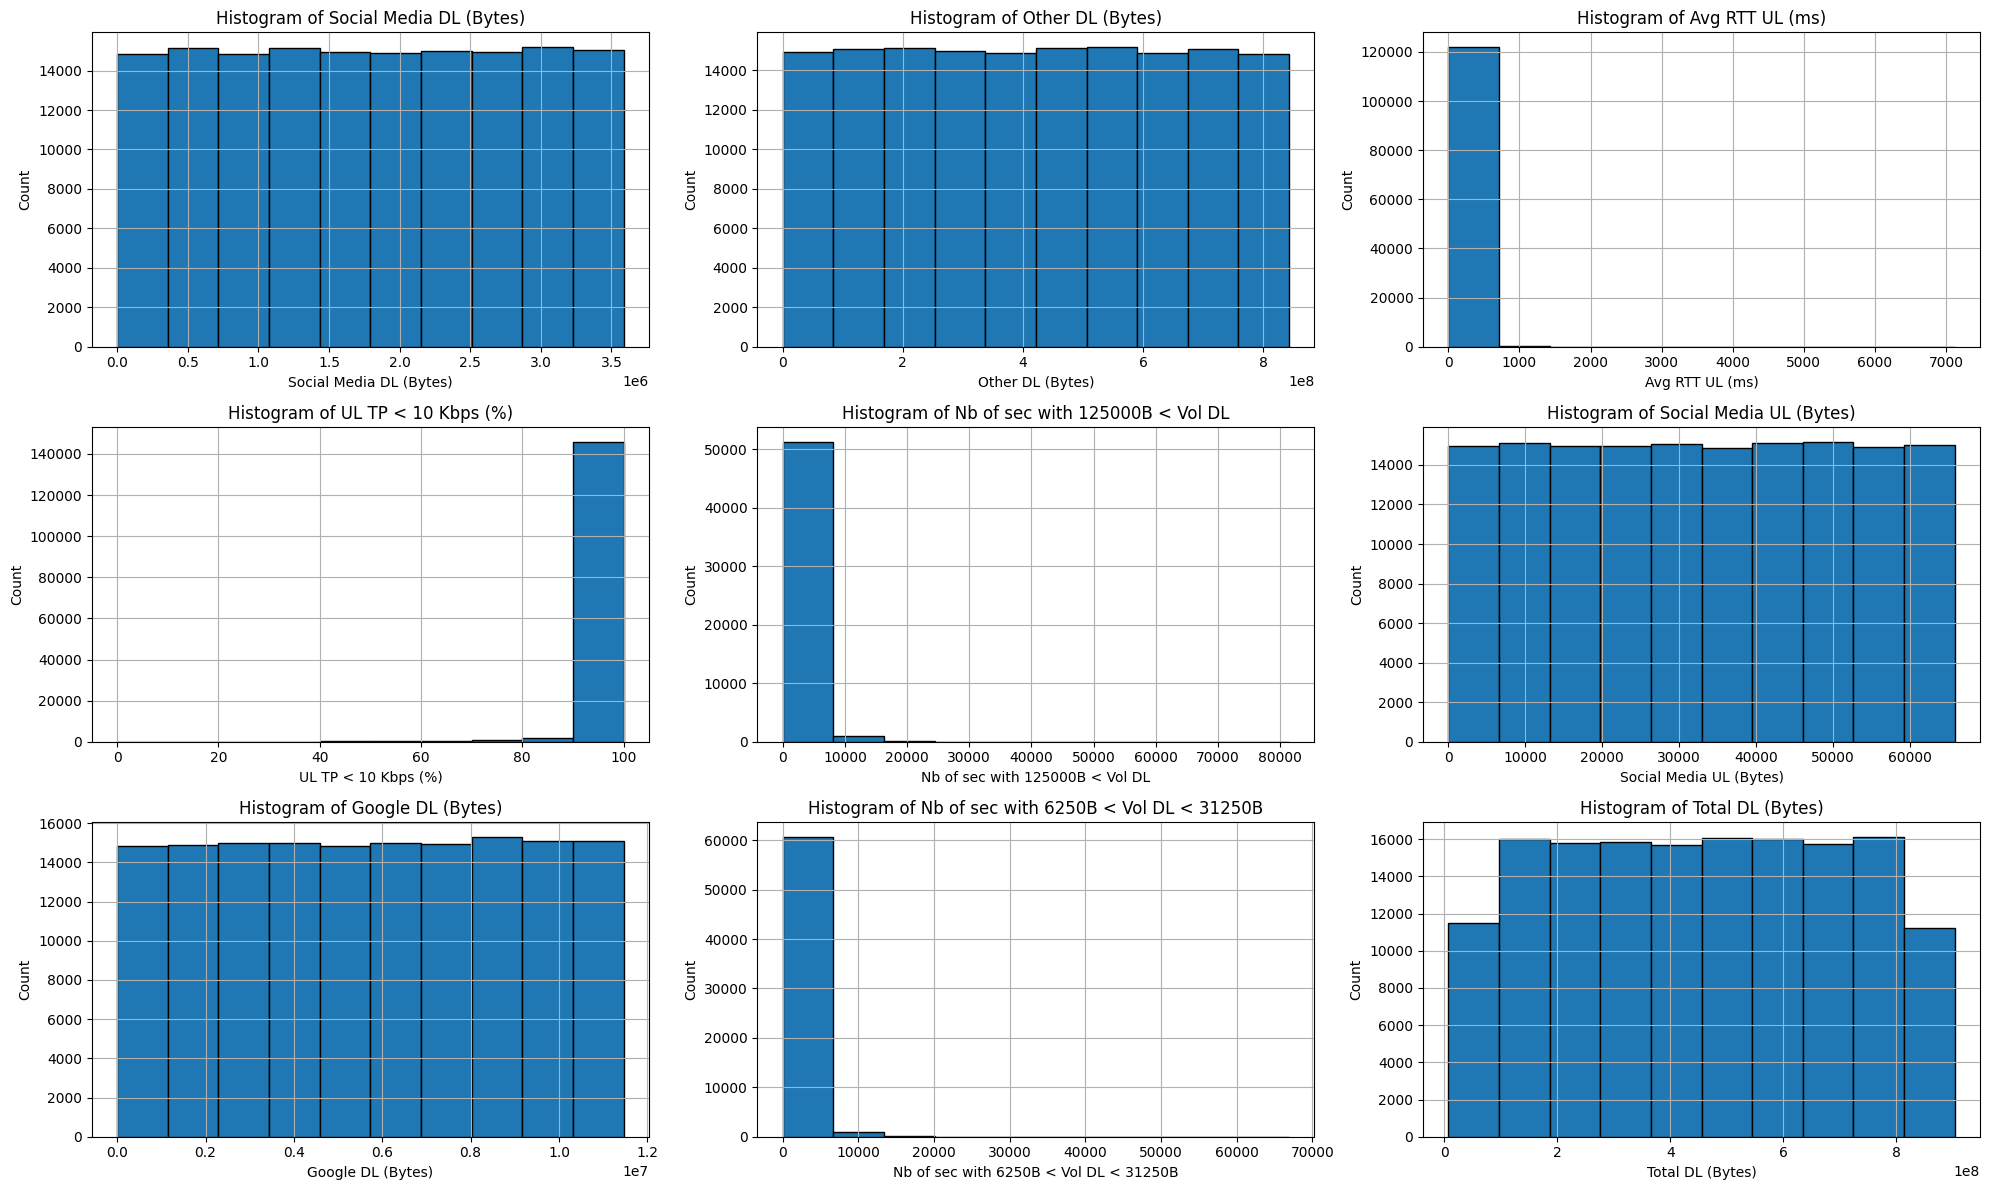

In [ ]:
import random
import math
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Select a subset of numerical columns (let's say 9 columns)
if len(numerical_cols) > 9:
    numerical_cols_subset = random.sample(numerical_cols, 9)
else:
    numerical_cols_subset = numerical_cols

# Calculate grid dimensions based on number of columns
num_cols = 3  # Choose a fixed number of columns
num_rows = math.ceil(len(numerical_cols_subset) / num_cols)

# Create the subplots (fixed grid size)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(numerical_cols_subset):
    visualize.plot_hist(df, col, ax=axes[i])

# Hide extra subplots (if any)
for j in range(len(numerical_cols_subset), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

2024-04-24 08:50:18,412 - src.visualization - INFO - Boxplot created for 'Bearer Id'
2024-04-24 08:50:18,452 - src.visualization - INFO - Boxplot created for 'Avg RTT DL (ms)'
2024-04-24 08:50:18,492 - src.visualization - INFO - Boxplot created for 'Nb of sec with 37500B < Vol UL'
2024-04-24 08:50:18,532 - src.visualization - INFO - Boxplot created for 'Social Media UL (Bytes)'
2024-04-24 08:50:18,573 - src.visualization - INFO - Boxplot created for '250 Kbps < DL TP < 1 Mbps (%)'
2024-04-24 08:50:18,606 - src.visualization - INFO - Boxplot created for 'HTTP UL (Bytes)'
2024-04-24 08:50:18,639 - src.visualization - INFO - Boxplot created for 'TCP UL Retrans. Vol (Bytes)'
2024-04-24 08:50:18,679 - src.visualization - INFO - Boxplot created for 'UL TP < 10 Kbps (%)'
2024-04-24 08:50:18,718 - src.visualization - INFO - Boxplot created for 'Youtube UL (Bytes)'


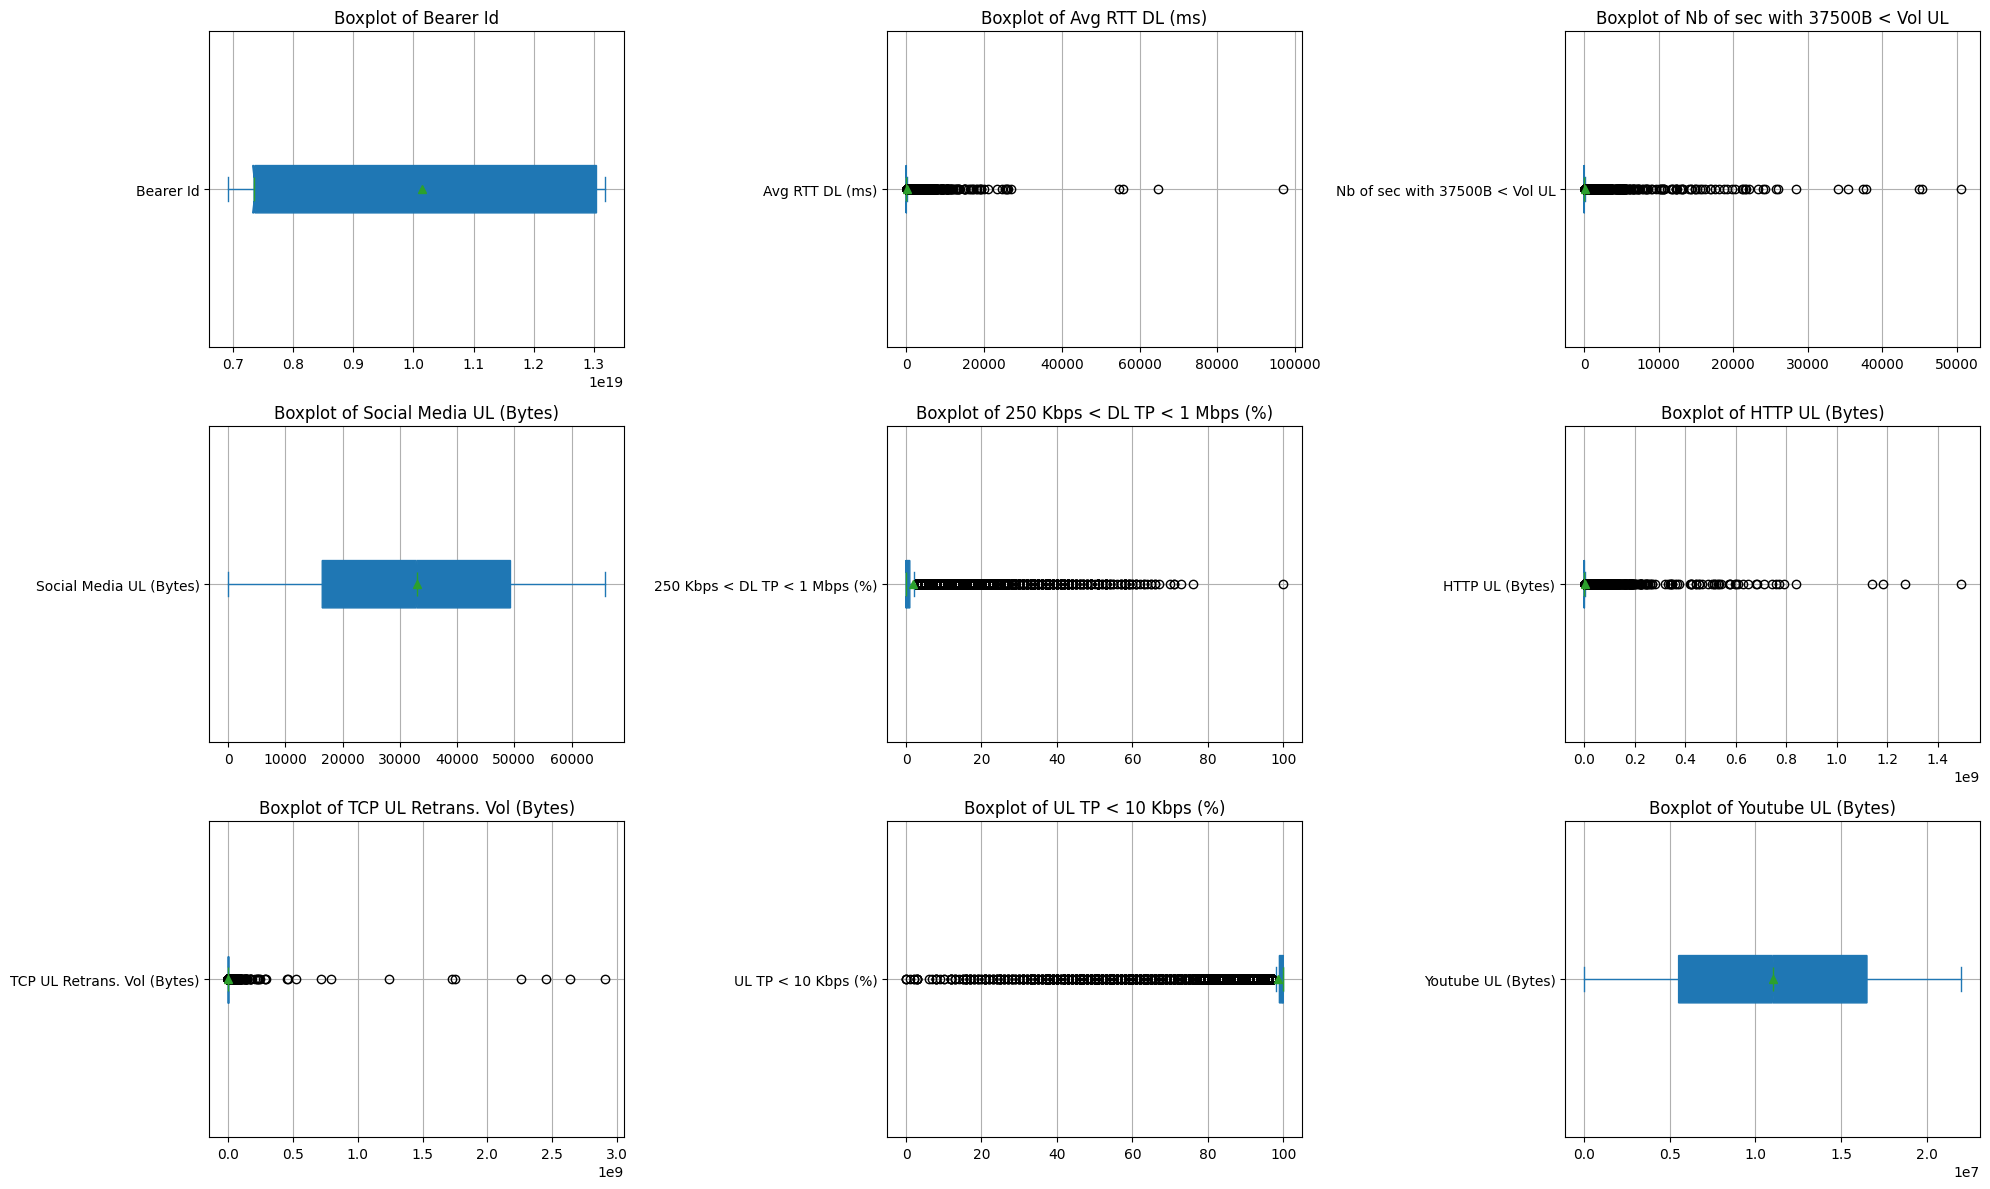

In [ ]:
import random
import math
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Select a subset of numerical columns (let's say 9 columns)
if len(numerical_cols) > 9:
    numerical_cols_subset = random.sample(numerical_cols, 9)
else:
    numerical_cols_subset = numerical_cols

# Calculate grid dimensions based on number of columns
num_cols = 3  # Choose a fixed number of columns
num_rows = math.ceil(len(numerical_cols_subset) / num_cols)

# Create the subplots (fixed grid size)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(numerical_cols_subset):
    visualize.plot_boxplot(df, col, ax=axes[i])

# Hide extra subplots (if any)
for j in range(len(numerical_cols_subset), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()